# Non-Negative Matrix Factorization

This is a matrix factorization technique where the matrix $X$ has non-negative values. The learned factorization $W$ and $H$ also have nonnegative values. We shall model text data from New York Times. $X$ will be our word frequency matrix i.e. $X_{ij}$ consists the number of times word i appears in document j. 

Our optimization problem is to minimixe the divergence penalty defined as follows:

\begin{equation}
\text{min } \sum_{ij} \left [X_{ij} ln \left(\frac{1}{(WH)_{ij}}\right) + (WH)_{ij} \right] \text{subject to } W_{ik} \ge 0, W_{kj} \ge 0
\end{equation}

**Randomly initialize H and W with non-negative values and iteratively update**

\begin{equation}
H_{kj} \leftarrow H_{kj} \frac{\sum_{i} W_{ik}X_{ij} / (WH)_{ij}}{\sum_{i} W_{ik}}
\end{equation}

\begin{equation}
W_{ik} \leftarrow W_{ik} \frac{\sum_{j} H_{kj}X_{ij} / (WH)_{ij}}{\sum_{j} H_{kj}}
\end{equation}



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as nplg
import scipy.sparse.linalg
%matplotlib inline

In [6]:
# Parse File

file = open("nyt_data.txt","r") 
X = np.zeros((3012,8447))
c1 =0

for line in file.readlines():
    curr_line = line.split(",")
    
    for ele in curr_line:
        X[int(ele.split(":")[0])-1][c1] = ele.split(":")[1]
    c1 += 1


In [7]:
# Function to calculate objective function

def objective():
    err = (10**(-16))
    WH = W.dot(H)
    I = np.ones(WH.shape)
    obj = X*np.log(I/(WH + err)) + WH
    return np.sum(obj)

In [8]:
#Initialize W and H
W = []
H= []

for i in range(X.shape[0]):
    W.append(np.random.uniform(1,2,25))
W = np.array(W)

for i in range(X.shape[1]):
    H.append(np.random.uniform(1,2,25))
H = (np.array(H)).T

obj_all=[]
err = (10**(-16))
for iter in range(100):
    H = H * ((W.T/np.sum(W.T,axis =1)[:,np.newaxis]).dot(X/(W.dot(H)+err)))
    W = W *((X/(W.dot(H)+err)).dot(H.T/np.sum(H.T,axis =0)[np.newaxis,:]))
    obj_all.append(objective())    

## Solution 2(a)

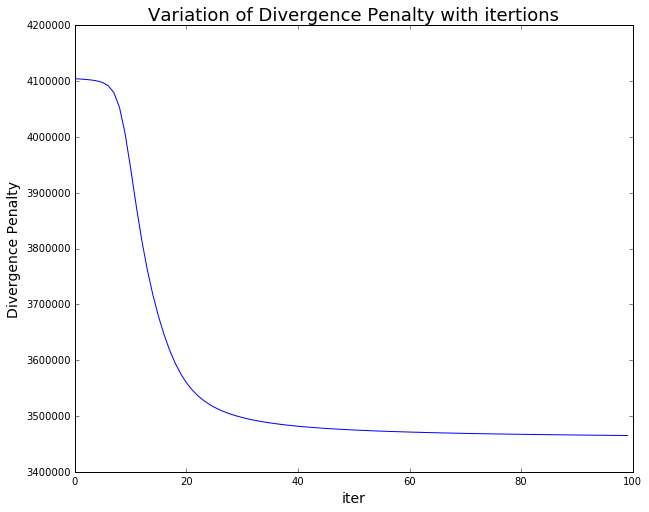

In [9]:
_=plt.figure(figsize = (10,8))
_=plt.title("Variation of Divergence Penalty with itertions", fontsize = 18)
_=plt.xlabel("iter",fontsize = 14)
_=plt.ylabel("Divergence Penalty",fontsize = 14)
_=plt.plot(range(100),obj_all)

## Solution 2 (b)

In [10]:
W_norm = (W/np.sum(W,axis =0)[np.newaxis,:])

# Get Top Weights
weights_ind = np.around(np.sort(W_norm,axis =0)[-10:,:].T,decimals = 6)

# Get Top weighted Words' index
words_ind = np.argsort(W_norm,axis = 0)[-10:,:].T

# Read vocab
vocab = pd.read_table("nyt_vocab.dat",delimiter = ",",header = None)


In [20]:
pd.Series(weights_ind[0][::-1])

0    0.037702
1    0.022457
2    0.018248
3    0.014681
4    0.014605
5    0.012333
6    0.012312
7    0.012165
8    0.010989
9    0.010761
dtype: float64

In [21]:
Results_df = pd.DataFrame()
for i in range(25):
    Results_df = pd.concat([Results_df, vocab.iloc[words_ind[i][::-1],:].reset_index(),pd.Series(weights_ind[i][::-1])], axis = 1)

In [23]:
Results_df.to_csv("topics.csv")

In [442]:
# Create 5 x 5 matrix of topics

mat_topics = [] 
temp = []

for i in range(25):
    
    b = list(np.fliplr(weights_ind)[i])
    c = list((np.char.array(vocab.iloc[np.fliplr(words_ind)[i],:])).reshape(10,))
    topic = [m+'-'+str(n) for m,n in zip(c,b)]
    temp.append(','.join(topic))
    
    if len(temp)==5:
        mat_topics.append(temp)
        temp = []

(pd.DataFrame(np.array(mat_topics)))

,0,1,2,3,4
0,"win-0.023384,second-0.020805,game-0....","art-0.016707,artist-0.011283,design-...","leader-0.016,official-0.012855,gover...","school-0.021623,program-0.018102,stu...","city-0.021365,building-0.017504,resi..."
1,"campaign-0.018338,political-0.017479...","computer-0.014007,system-0.01165,inf...","pay-0.019962,tax-0.01557,cut-0.01497...","tell-0.009134,ask-0.008597,car-0.008...","father-0.043486,mother-0.036408,son-..."
2,"life-0.013482,book-0.0098,man-0.0090...","team-0.021815,player-0.019134,game-0...","police-0.034612,man-0.02282,officer-...","television-0.027926,write-0.01418,ne...","charge-0.017072,case-0.015408,lawyer..."
3,"company-0.028379,stock-0.018477,shar...","music-0.018394,play-0.016357,perform...","official-0.011091,kill-0.010233,mile...","company-0.034818,executive-0.019276,...","health-0.021547,drug-0.016278,doctor..."
4,"percent-0.032488,rate-0.017395,rise-...","law-0.024319,rule-0.019437,court-0.0...","american-0.034215,states-0.027311,co...","food-0.020835,serve-0.011243,restaur...","water-0.013519,foot-0.008597,wear-0...."
